In [5]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import numpy as np
from AnalysisUtils.analysis_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%%time
rc_df = pd.read_csv("../data/rc_bbdyw.csv")
rc_df.columns=["open_date", "close_date", "symbol", "action",
                 "lots", "sl", "tp", "open_price", "close_price",
                 "pips", "profits", "Duration", "Change"]
rc_df["open_date"] = pd.to_datetime(rc_df["open_date"])
rc_df["close_date"] = pd.to_datetime(rc_df["close_date"])
def str2float(row):
    if "," in row:
        return float(row.split(",")[0] + row.split(",")[1])
    return float(row)
rc_df["pips"] = rc_df["pips"].apply(str2float)
rc_df["profits"] = rc_df["profits"].apply(str2float)
rc_df.head()

In [ ]:
rc_df["symbol"].unique()

<AxesSubplot:>

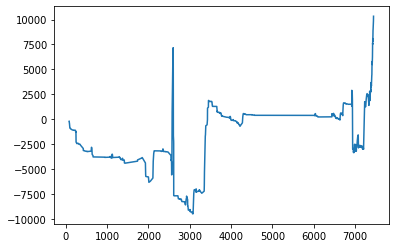

In [96]:
ana_df = rc_df[rc_df["symbol"]=="XAUUSD"]
ana_df["profits"].cumsum().plot()

10333.829999999998

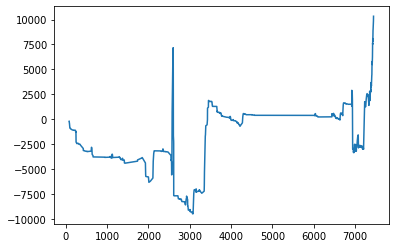

In [100]:
# ana_df = rc_df[(rc_df["close_date"]>="2021-11-23 21:50:00") & (rc_df["close_date"]<"2021-11-29 21:50:00")]
# ana_df = rc_df[(rc_df["close_date"]>="2021-10-07 00:00:00") & (rc_df["close_date"]<"2021-10-07 23:55:00")]
ana_df = rc_df
ana_df = ana_df[ana_df["symbol"]=="XAUUSD"]
# ana_df = rc_df

ana_df["profits"].cumsum().plot()
ana_df["profits"].sum()

<AxesSubplot:xlabel='symbol,action,close_date'>

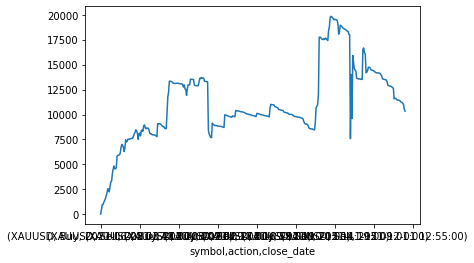

In [101]:
ana_grp_df = ana_df.groupby(by=["symbol", "action", "close_date"])\
                   .agg({"profits":"sum", "pips":"count", "lots":"sum"})\
                   .sort_values("close_date")
ana_grp_df["profits"].cumsum().plot()

/home/jackie/anaconda3/envs/rbsys/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39057 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jackie/anaconda3/envs/rbsys/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jackie/anaconda3/envs/rbsys/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29575 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jackie/anaconda3/envs/rbsys/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jackie/anaconda3/envs/rbsys/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jackie/anaconda3/envs/rb

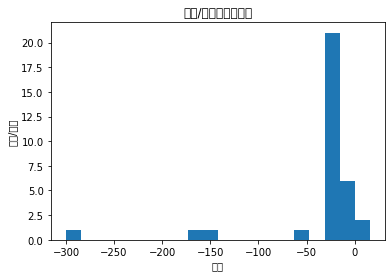

In [26]:
import matplotlib.pyplot as plt
plt.hist(ana_grp_df["profits"], bins=20)
# 显示横轴标签
plt.xlabel("区间")
# 显示纵轴标签
plt.ylabel("频数/频率")
# 显示图标题
plt.title("频数/频率分布直方图")
plt.show()

In [ ]:
ana_df[ana_df["symbol"] == "XAUUSD"].sort_values("profits")

In [ ]:
pd.__version__

In [ ]:
4 + 3 + 2 + 1

In [ ]:
7 + 6 + 5 + 4 + 3 + 2 + 1